<a href="https://colab.research.google.com/github/RutujKhare1/CS6910_Assignment_1/blob/main/FDL_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
num_label = 10
num_samples = len(X_train)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("Train shape : {}, {}".format(X_train.shape, y_train.shape))
print("Test shape : {}, {}".format(X_test.shape, y_test.shape))

Train shape : (60000, 28, 28), (60000,)
Test shape : (10000, 28, 28), (10000,)


# Question 1

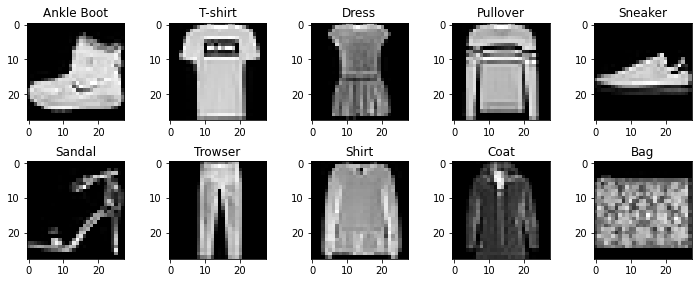

In [4]:
num_row = 2
num_col = 5

cnt = 30
images = X_train[:cnt]
labels = y_train[:cnt]
dic = {0:'T-shirt', 1:'Trowser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

visited = [True for i in range(10)]
r_idx = 0
c_idx = 0
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col, 2*num_row))
for i in range(cnt):
  if(visited[labels[i]]):
    if(c_idx == num_col):
      r_idx = 1
      c_idx = 0
    visited[labels[i]] = False
    ax = axes[r_idx, c_idx]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('{}'.format(dic[labels[i]]))
    c_idx += 1 
plt.tight_layout()
plt.show()

#Question 2

In [5]:
#activation functions

def sigmoid(x):
  z = x.copy()
  z[x < 0] = np.exp(x[x < 0])/(1 + np.exp(x[x<0]))
  z[x >= 0] = 1/(1+np.exp(-x[x >= 0]))
  return z

def softmax(x):
  e_x = np.exp(x - max(x))
  return e_x / e_x.sum()

def d_sigmoid(x):
  return sigmoid(x)*(1 - sigmoid(x))

  

In [6]:
# num_layers = 5
# hidden_size = 4
# num_labels = num_label
# xdim = 60000
# ydim = 784
# w = list()
# b = list()
# w.append(np.random.rand(hidden_size, ydim))
# b.append(np.random.rand(hidden_size,1))
# for i in range(num_layers-1):
#   w.append(np.random.rand(hidden_size, hidden_size))
#   b.append(np.random.rand(hidden_size,1))
# w.append(np.random.rand(num_labels, hidden_size))
# b.append(np.random.rand(num_labels,1))
# X = np.reshape(X_train, (60000,784))
# W = w
# B = b

In [7]:
# H=list()
# A=list()
# a = np.array(W[0]@X.T + B[0])
# h = sigmoid(a.T).T
# H.append(h)
# A.append(a)
# cur_ip = h

# for i in range(num_layers-1):
#   a = np.array(W[i+1]@cur_ip + B[i+1])
#   h = sigmoid(a.T).T
#   H.append(h)
#   A.append(a)
#   cur_ip = h
# a = np.array(W[num_layers]@cur_ip + B[num_layers])
# h = a.T
# A.append(a)
# y = np.array([softmax(i) for i in h]).T

In [8]:
# ey = np.zeros([60000,10], dtype= int)
# for i in range(60000):
#   ey[i][y_train[i]] = 1

# d_aL = -(ey.T - y)   #(60000, 10)
# D_W = list()
# D_B = list()
# for k in reversed(range(1,num_layers+1)):
#   # print("k:",k)
#   # print("d_aL : ",d_aL.shape)
#   # print("h_k-1 : {}x{}".format(len(H[k-1]), len(H[k-1][0])))
#   d_wL = d_aL@H[k-1].T
#   D_W.append(d_wL)
#   # print("d_wL : ",d_wL.shape)
#   d_bL = d_aL
#   d_bL = np.sum(d_bL, axis = 1).reshape(len(d_bL),1)
#   # print(d_bL.shape)
#   D_B.append(d_bL)
#   # print("W[k] : ",W[k].shape)
#   d_hL = W[k].T@d_aL
#   dga = d_sigmoid(A[k-1])
#   # print("d_hL : ",d_hL.shape)
#   # print("dga : ",dga.shape)
#   d_aL = np.multiply(d_hL,dga)
#   # print("d_aL : ",d_aL.shape)
#   # print("\n")

# d_wL = d_aL @ X
# d_bL = d_aL
# d_bL = np.sum(d_bL, axis = 1).reshape(len(d_bL),1)
# D_W.append(d_wL)
# D_B.append(d_bL)
# print(d_wL.shape)

# # print(d_aL.shape)
# # print(H[3].shape)
# # d_wL = d_aL@H[3].T
# # d_bL = d_aL
# # d_hL = W[4]@d_aL

# # dga = d_sigmoid(A[3])
# # d_aL = d_hL@dga

In [16]:
class Optimizer:
  def forwardPropagation(self, W, B, X, num_layer):
    H=list()
    A=list()
    a = np.array(W[0]@X.T + B[0])
    h = sigmoid(a.T).T
    H.append(h)
    A.append(a)
    cur_ip = h

    for i in range(num_layer-1):
      a = np.array(W[i+1]@cur_ip + B[i+1])
      h = sigmoid(a.T).T
      H.append(h)
      A.append(a)
      cur_ip = h
    a = np.array(W[num_layer]@cur_ip + B[num_layer])
    h = a.T
    A.append(a)
    y = np.array([softmax(i) for i in h]).T
    return H, A, y

  def backwardPropagation(self, H, A, y, W, B, X, num_layer, num_label):
    xdim = X.shape[0]
    ey = np.zeros([xdim,num_label], dtype= int)
    for i in range(xdim):
      ey[i][Y[i]] = 1

    d_aL = -(ey.T - y)   #(60000, 10)
    D_W = list()
    D_B = list()
    for k in reversed(range(1,num_layer+1)):
      # print("k:",k)
      # print("d_aL : ",d_aL.shape)
      # print("h_k-1 : {}x{}".format(len(H[k-1]), len(H[k-1][0])))
      d_wL = d_aL@H[k-1].T
      D_W.append(d_wL/xdim)

      # print("d_wL : ",d_wL.shape)
      
      d_bL = np.sum(d_aL, axis = 1).reshape(len(d_aL),1)/xdim
      D_B.append(d_bL)
      
      # print("W[k] : ",W[k].shape)
      
      d_hL = W[k].T@d_aL
      dga = d_sigmoid(A[k-1])
      
      # print("d_hL : ",d_hL.shape)
      # print("dga : ",dga.shape)
      
      d_aL = np.multiply(d_hL,dga)
      
      # print("d_aL : ",d_aL.shape)
      # print("\n")

    d_wL = d_aL @ X
    d_bL = d_aL
    d_bL = np.sum(d_bL, axis = 1).reshape(len(d_aL),1)/xdim
    D_W.append(d_wL/xdim)
    D_B.append(d_bL)
    return D_W, D_B
    # print(d_aL.shape)
    # print(H[3].shape)
    # d_wL = d_aL@H[3].T
    # d_bL = d_aL
    # d_hL = W[4]@d_aL
    # dga = d_sigmoid(A[3])
    # d_aL = d_hL@dga

In [27]:
class feedforwardNeuralNetworkUpd:
  def __init__(self, num_layers = 5, hidden_size = 256, xdim = 60000, ydim = 784, num_labels = 10, neta = 0.05, epochs = 30):
    self.num_layers = num_layers
    self.hidden_size = hidden_size
    self.xdim = xdim
    self.ydim = ydim
    self.num_labels = num_labels
    self.neta = neta
    self.epochs = epochs
    w = list()
    b = list()
    w.append(np.random.randn(hidden_size, ydim))
    b.append(np.random.randn(hidden_size,1))
    # b.append(np.zeros([hidden_size,1]))
    for i in range(self.num_layers-1):
      w.append(np.random.randn(hidden_size, hidden_size))
      b.append(np.random.randn(hidden_size,1))
      # b.append(np.zeros([hidden_size,1]))
    w.append(np.random.randn(num_labels, hidden_size))
    b.append(np.random.randn(num_labels,1))
    # b.append(np.zeros([num_labels,1]))
    self.W = w
    self.B = b
  
  def feedForward(self):
    a = np.array(self.W[0]@X.T + self.B[0])
    h = sigmoid(a.T).T
    cur_ip = h

    for i in range(self.num_layers-1):
      a = np.array(self.W[i+1]@cur_ip + self.B[i+1])
      h = sigmoid(a.T).T
      cur_ip = h
    a = np.array(self.W[self.num_layers]@cur_ip + self.B[self.num_layers])
    h = a.T
    y = np.array([softmax(i) for i in h]).T
    return y
  
  

  def gradientDescent(self):
    for k in range(self.epochs):
      O = Optimizer()
      H, A, y = O.forwardPropagation(self.W, self.B, X, self.num_layers)
      D_W, D_B = O.backwardPropagation(H, A, y, self.W, self.B, X, self.num_layers, self.num_labels)
      D_W = np.flip(D_W)
      D_B = np.flip(D_B)
      # print(self.B[0].shape)
      # print(D_B[0].shape)
      for i in range(self.num_layers+1):
        self.W[i] = self.W[i] - 0.1*D_W[i]
        self.B[i] = self.B[i] - 0.1*D_B[i] 
      
      y_hat = self.feedForward()
      Y_one_hot = np.eye(self.num_labels)[Y]
      loss = -np.sum(Y_one_hot * np.log(y_hat.T + 1e-15) )
      print("Epoch {} : {}".format(k, (loss/batch)))
  

  def momentumGD(self, beta = 0.9, eta = 1.0):
    for k in range(self.epochs):
      O = Optimizer()
      H, A, y = O.forwardPropagation(self.W, self.B, X, self.num_layers)
      D_W, D_B = O.backwardPropagation(H, A, y, self.W, self.B, X, self.num_layers, self.num_labels)
      D_W = np.flip(D_W)
      D_B = np.flip(D_B)
      if k==0:
        uw = D_W
        ub = D_B
      else:
        uw = beta*prev_uw + eta*D_W
        ub = beta*prev_ub + eta*D_B
      for i in range(self.num_layers+1):
        self.W[i] = self.W[i] - 0.1*uw[i]
        self.B[i] = self.B[i] - 0.1*ub[i]
      prev_uw = uw
      prev_ub = ub 
      
      y_hat = self.feedForward()
      Y_one_hot = np.eye(self.num_labels)[Y]
      loss = -np.sum(Y_one_hot * np.log(y_hat.T + 1e-15) )
      print("Epoch {} : {}".format(k, (loss/batch)))
  
  def nagGD(self, beta = 0.1, eta = 1.0):
    for k in range(self.epochs):
      O = Optimizer()
      if k==0:
        H, A, y = O.forwardPropagation(self.W, self.B, X, self.num_layers)
        D_W, D_B = O.backwardPropagation(H, A, y, self.W, self.B, X, self.num_layers, self.num_labels)
      else:
        u_w = beta*prev_uw
        u_b = beta*prev_ub
        temp_u_w = list()
        temp_u_b = list()
        for i in range(len(self.W)):
          temp_u_w.append(self.W[i]-u_w[i])
          temp_u_b.append(self.B[i]-u_b[i])  
        H, A, y = O.forwardPropagation(temp_u_w, temp_u_b, X, self.num_layers)
        D_W, D_B = O.backwardPropagation(H, A, y, temp_u_w, temp_u_b, X, self.num_layers, self.num_labels)

      D_W = np.flip(D_W)
      D_B = np.flip(D_B)
      if k==0:
        uw = D_W
        ub = D_B
      else:
        uw = beta*prev_uw + eta*D_W
        ub = beta*prev_ub + eta*D_B
      for i in range(self.num_layers+1):
        self.W[i] = self.W[i] - 0.1*uw[i]
        self.B[i] = self.B[i] - 0.1*ub[i]
      prev_uw = uw
      prev_ub = ub 
      
      y_hat = self.feedForward()
      Y_one_hot = np.eye(self.num_labels)[Y]
      loss = -np.sum(Y_one_hot * np.log(y_hat.T + 1e-15) )
      print("Epoch {} : {}".format(k, (loss/batch)))
    



  def accuracy(self, Y):
    pred = np.argmax(Y, axis=1)
    print(pred.shape)

In [ ]:
X = np.reshape(X_train, (60000,784))/255
batch = 5000
X = X[:batch]
Y = y_train[:batch]
F = feedforwardNeuralNetworkUpd(xdim = batch)
F.momentumGD()
y_hat = F.feedForward()


In [21]:
pred = np.argmax(y_hat, axis=0)
# print(Y)
# print(pred)
accuracy = np.mean(pred==Y)
print("Accuracy : {}".format(accuracy))

Accuracy : 0.6364


In [28]:
X = np.reshape(X_train, (60000,784))/255
batch = 5000
X = X[:batch]
Y = y_train[:batch]
F = feedforwardNeuralNetworkUpd(xdim = batch)
F.nagGD()
y_hat = F.feedForward()

pred = np.argmax(y_hat, axis=0)
# print(Y)
# print(pred)
accuracy = np.mean(pred==Y)
print("Accuracy : {}".format(accuracy))

Epoch 0 : 11.891951646057205
Epoch 1 : 8.918570871800686
Epoch 2 : 7.287754590769665
Epoch 3 : 5.0540295755784115
Epoch 4 : 4.440996005654442
Epoch 5 : 3.965637810155178
Epoch 6 : 3.6498257428272685
Epoch 7 : 3.4243281626134063
Epoch 8 : 3.5925368879091772
Epoch 9 : 3.205180827801986
Epoch 10 : 3.16779333777652
Epoch 11 : 3.1201232046928222
Epoch 12 : 2.904173716032583
Epoch 13 : 2.795944490733493
Epoch 14 : 2.663904437464401
Epoch 15 : 2.608314396673336
Epoch 16 : 2.3765472162750707
Epoch 17 : 2.5348793488670593
Epoch 18 : 2.1562763606351174
Epoch 19 : 2.2990123170997956
Epoch 20 : 2.1716326796450556
Epoch 21 : 2.116478744215426
Epoch 22 : 2.0640934851922417
Epoch 23 : 2.0287568392647235
Epoch 24 : 1.973035283518163
Epoch 25 : 1.916236790659676
Epoch 26 : 1.893200927206545
Epoch 27 : 1.8505640110110522
Epoch 28 : 1.8124316807814747
Epoch 29 : 1.7905035875569355
Accuracy : 0.4486
